# Feature Encoding

In [3]:
# General imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
from matplotlib import cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import export_text
plt.style.use("ggplot")

In [8]:
data = pd.read_csv("students.csv")
data.head()

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [11]:
df = data.drop(columns=["Class"])
y = data["Class"]
attribute_names = list(df.columns)

In [12]:
attribute_names

['gender',
 'NationalITy',
 'StageID',
 'GradeID',
 'SectionID',
 'Topic',
 'Semester',
 'Relation',
 'raisedhands',
 'VisITedResources',
 'AnnouncementsView',
 'Discussion',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'StudentAbsenceDays']

## Quick Exploration


In [13]:
df

,gender,NationalITy,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays
0,M,KW,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,KW,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,KW,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,KW,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,KW,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7
476,F,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7
477,F,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7
478,F,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7


In [14]:
df["NationalITy"].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

<AxesSubplot:title={'center':'Credit History'}>

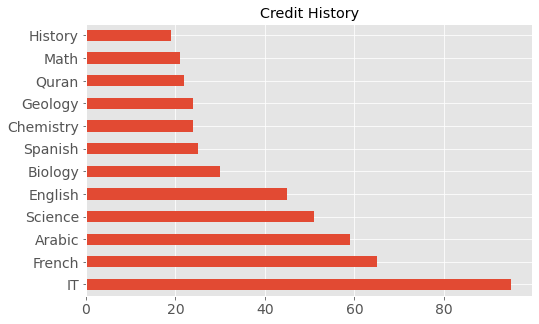

In [15]:
df["Topic"].value_counts().plot(kind="barh", title="Credit History", fontsize=14, figsize=(8,5))

## Exercise 1 - Support Distance Algorithms


### Exercise 1.1

Convert all categorical features to support one-hot-vector encoding. 

### Exercise 1.2

Normalize all features to the closed range zero to one.

### Exercise 1.3

Remove all NULL values

### Exercise 1.4

Run K-Means and use the elbow method to estimate the number of clusters. 

![K_Means_Elbow_Method](https://raw.githubusercontent.com/satishgunjal/images/master/K_Means_Elbow_Method.png)


In [15]:
def get_kmeans_accuracy(data, top_k):
    sum_squared = []
    silhouette = []
    K = range(2, top_k)
    for i in K:
        kmeans = KMeans(n_clusters = i, init = 'k-means++')
        kmeans.fit(data)
        sum_squared.append(kmeans.inertia_)
        silhouette.append(silhouette_score(data, kmeans.labels_))
    return pd.DataFrame({
    "K": K,
    "SSE": sum_squared,
    "SIL": silhouette
  })

### Exercise 1.5

1. Choose the near optimal K by the elbow method. 
2. Create the clusters and plot their silhouette score.

## Exercise 2 - Support Non-Metric Algorithms


### Exercise 2.1

Encode variables using LabelEncoder


### Exercise 2.2

Use 25% of training set and evaulate the results (present the confusion matrix)

### Exercise 2.3

Use the target variable and train Decision Tree classifier.

### Exercise 2.4

Print the confusion matrix and the accuracy score of the model.

In [17]:
# print(export_text(dt, feature_names=list(df.columns)))

## Based on this result, what is the major problem of single decision tree?